In [4]:
#import basic libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) #adjust the configuration of the plots we will create


#read in the data

df = pd.read_csv(r'movies.csv')

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [5]:
#checking for missinig or null value data



for col in df.columns:
    val_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, val_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
#checking datatypes of the our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
#let's format our column's datatypes


df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype('int64')


#gross
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype('int64')

In [11]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [12]:
#creating correct year data

df['yearcorrect'] = df['released'].astype(str).str[:4]



In [13]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

In [18]:
#checking if there is any row with different released date format

invalid_row = df[~df['released'].str.contains(r'\d{4}', na=False)]
invalid_row

name rating  genre  year released  score     votes  \
5728  Saw: The Final Chapter      R  Crime  2010      NaN    5.6   93000.0   
5730             The Wolfman      R  Drama  2010      NaN    5.8  104000.0   

            director               writer              star country  budget  \
5728  Kevin Greutert       Patrick Melton        Tobin Bell     NaN       0   
5730    Joe Johnston  Andrew Kevin Walker  Benicio Del Toro     NaN       0   

      gross company  runtime yearcorrect  
5728      0     NaN      NaN         nan  
5730      0     NaN      NaN         nan

In [23]:
#creating correct year data 
df['yearcorrect'] = df['released'].str.extract(r'(\d{4})')

#and chekck

df.head()

df.tail()

name rating   genre  year                          released  \
7663   More to Life    NaN   Drama  2020  October 23, 2020 (United States)   
7664    Dream Round    NaN  Comedy  2020  February 7, 2020 (United States)   
7665  Saving Mbango    NaN   Drama  2020         April 27, 2020 (Cameroon)   
7666   It's Just Us    NaN   Drama  2020   October 1, 2020 (United States)   
7667      Tee em el    NaN  Horror  2020   August 19, 2020 (United States)   

      score  votes       director         writer              star  \
7663    3.1   18.0  Joseph Ebanks  Joseph Ebanks      Shannon Bond   
7664    4.7   36.0   Dusty Dukatz    Lisa Huston  Michael Saquella   
7665    5.7   29.0   Nkanya Nkwai   Lynno Lovert      Onyama Laura   
7666    NaN    NaN  James Randall  James Randall     Christina Roz   
7667    5.7    7.0   Pereko Mosia   Pereko Mosia  Siyabonga Mabaso   

            country  budget  gross                    company  runtime  \
7663  United States    7000      0                        NaN     90.0   
7664  United States       0      0  Cactus Blue Entertainment     90.0   
7665  United States   58750      0           Embi Productions      NaN   
7666  United States   15000      0                        NaN    120.0   
7667   South Africa       0      0                PK 65 Films    102.0   

     yearcorrect  
7663        2020  
7664        2020  
7665        2020  
7666        2020  
7667        2020

In [24]:
#let's sort the data

df.sort_values(by=['gross'], inplace=False, ascending=False)

name rating    genre  year  \
5445                                      Avatar  PG-13   Action  2009   
7445                           Avengers: Endgame  PG-13   Action  2019   
3045                                     Titanic  PG-13    Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13   Action  2015   
7244                      Avengers: Infinity War  PG-13   Action  2018   
...                                          ...    ...      ...   ...   
1617                             Mortal Passions      R    Crime  1989   
1614                              Edge of Sanity      R   Horror  1989   
1606                                   I, Madman      R  Fantasy  1989   
1601                        My Twentieth Century    NaN   Comedy  1989   
7667                                   Tee em el    NaN   Horror  2020   

                               released  score      votes        director  \
5445  December 18, 2009 (United States)    7.8  1100000.0   James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0   Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0   James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0     J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0   Anthony Russo   
...                                 ...    ...        ...             ...   
1617   January 26, 1990 (United States)    4.5      274.0     Andrew Lane   
1614     April 14, 1989 (United States)    5.2     1300.0  Gérard Kikoïne   
1606      April 7, 1989 (United States)    6.0     2900.0    Tibor Takács   
1601           January 13, 1990 (Japan)    7.1     1500.0   Ildikó Enyedi   
7667    August 19, 2020 (United States)    5.7        7.0    Pereko Mosia   

                  writer               star         country     budget  \
5445       James Cameron    Sam Worthington   United States  237000000   
7445  Christopher Markus  Robert Downey Jr.   United States  356000000   
3045       James Cameron  Leonardo DiCaprio   United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley   United States  245000000   
7244  Christopher Markus  Robert Downey Jr.   United States  321000000   
...                  ...                ...             ...        ...   
1617      Alan Moskowitz      Zach Galligan   United States          0   
1614          J.P. Félix    Anthony Perkins  United Kingdom          0   
1606       David Chaskin       Jenny Wright          Canada          0   
1601       Ildikó Enyedi       Dorota Segda         Hungary          0   
7667        Pereko Mosia   Siyabonga Mabaso    South Africa          0   

           gross                          company  runtime yearcorrect  
5445  2847246203            Twentieth Century Fox    162.0        2009  
7445  2797501328                   Marvel Studios    181.0        2019  
3045  2201647264            Twentieth Century Fox    194.0        1997  
6663  2069521700                        Lucasfilm    138.0        2015  
7244  2048359754                   Marvel Studios    149.0        2018  
...          ...                              ...      ...         ...  
1617           0          Gibraltar Entertainment     92.0        1990  
1614           0                    Allied Vision     85.0        1989  
1606           0  Trans World Entertainment (TWE)     89.0        1989  
1601           0         Budapest Stúdió Vállalat    104.0        1990  
7667           0                      PK 65 Films    102.0        2020  

[7668 rows x 16 columns]

In [26]:
pd.set_option('display.max_rows', None)

In [28]:
#to drop any duplicates

#df.drop_duplicates()

#show unique/distinict
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

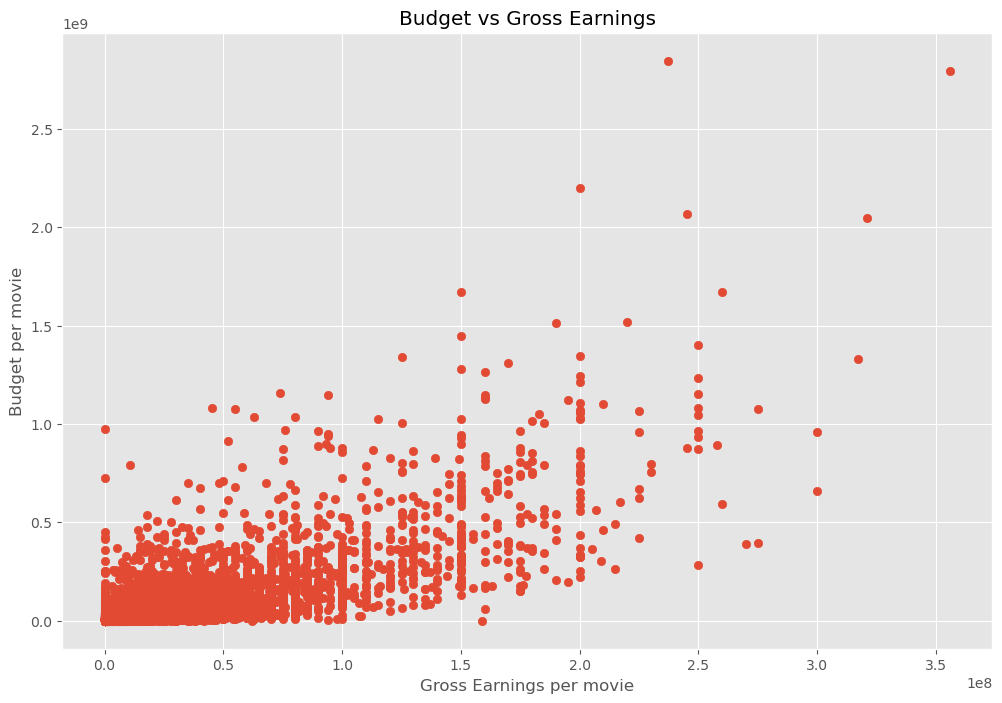

In [33]:
#plot

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings per movie')
plt.ylabel('Budget per movie')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

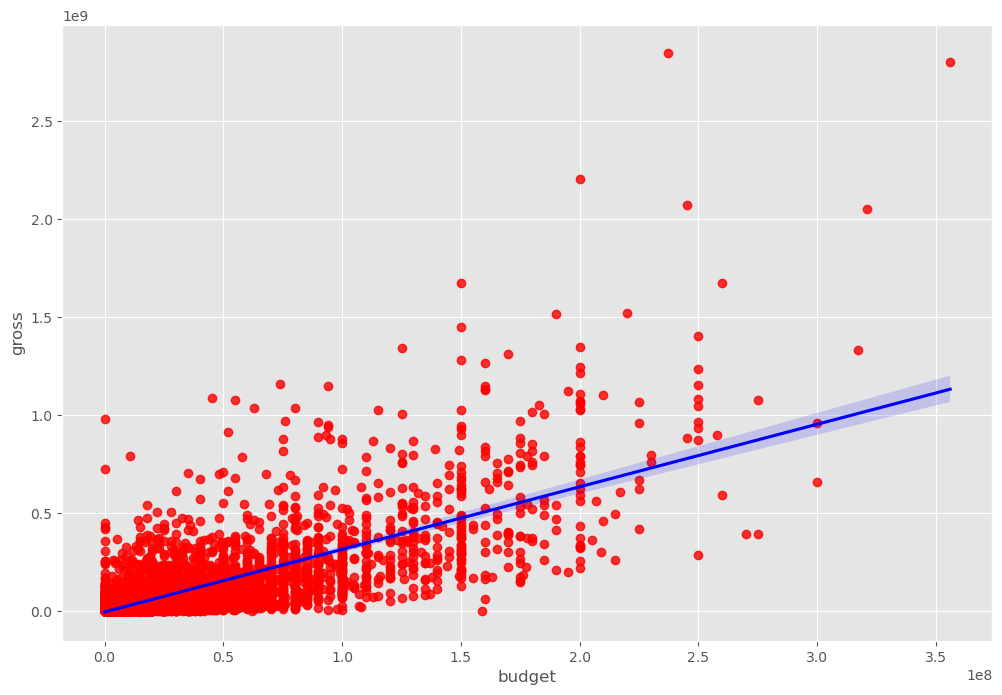

In [35]:
#plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data = df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [36]:
# correlation 

df.corr() 

#there are different types of correlation methods
#pearson, kendall, spearman

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000

In [37]:
df.corr(method = 'pearson') # this is the default method of correlation and it is linear correlation

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000

In [38]:
df.corr(method = 'kendall') # is the ordianl association 

year     score     votes    budget     gross   runtime
year     1.000000  0.067652  0.331465  0.209304  0.216595  0.097184
score    0.067652  1.000000  0.300115 -0.005194  0.090626  0.283611
votes    0.331465  0.300115  1.000000  0.439902  0.560118  0.198240
budget   0.209304 -0.005194  0.439902  1.000000  0.541956  0.176016
gross    0.216595  0.090626  0.560118  0.541956  1.000000  0.176912
runtime  0.097184  0.283611  0.198240  0.176016  0.176912  1.000000

In [40]:
df.corr(method = 'spearman') # this checks monolithic relationship values that consistencly increase or deacrease. 

year     score     votes    budget     gross   runtime
year     1.000000  0.099045  0.469829  0.291152  0.314681  0.142977
score    0.099045  1.000000  0.428138 -0.007500  0.132569  0.399857
votes    0.469829  0.428138  1.000000  0.604627  0.752265  0.290159
budget   0.291152 -0.007500  0.604627  1.000000  0.716816  0.246748
gross    0.314681  0.132569  0.752265  0.716816  1.000000  0.256783
runtime  0.142977  0.399857  0.290159  0.246748  0.256783  1.000000

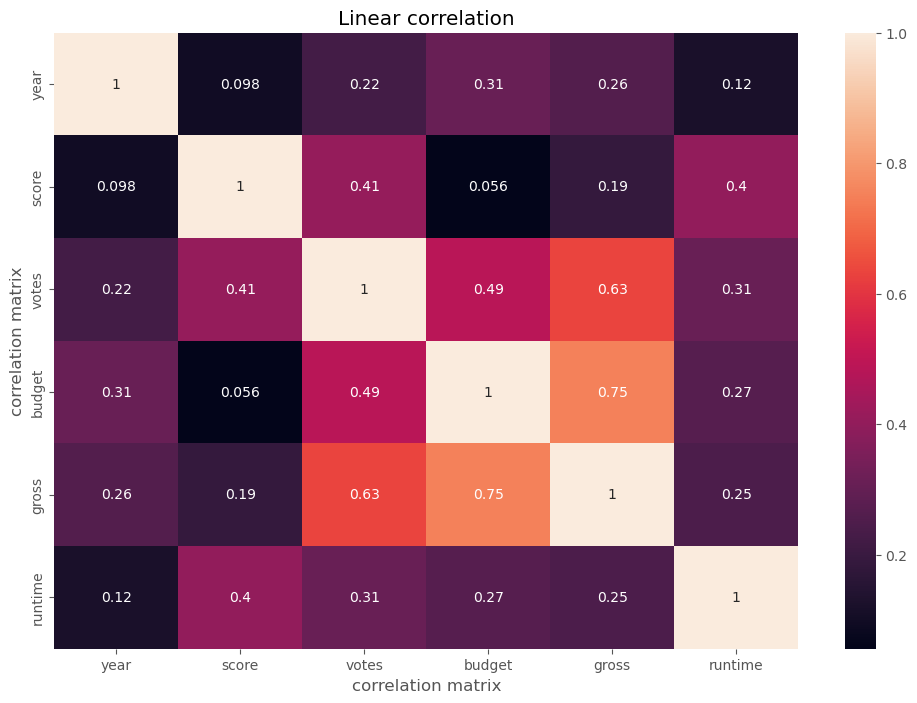

In [42]:
# ploting the correaltion 

correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Linear correlation')
plt.xlabel('correlation matrix')
plt.ylabel('correlation matrix')
plt.show()

In [43]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0        2009  
7445  2797501328         Marvel Studios    181.0        2019  
3045  2201647264  Twentieth Century Fox    194.0        1997  
6663  2069521700              Lucasfilm    138.0        2015  
7244  2048359754         Marvel Studios    149.0        2018

In [45]:
 df_numerized = df 
    
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   
7480  6194       4      2  2019      1488    6.9   222000.0      1455    1919   
6653  2969       5      0  2015      1704    7.0   593000.0       517    3568   
6043  5502       5      0  2012      2472    8.0  1300000.0      1517    2314   
6646  2145       5      0  2015       221    7.1   370000.0      1189     706   
7494  2131       4      2  2019      2676    6.8   148000.0       432    1950   
6644   534       5      0  2015      2235    7.3   777000.0      1517    2314   
7247   791       5      0  2018       959    7.3   661000.0      2457    3795   
5845  2407       5      1  2011      1445    8.1   790000.0       679    4052   
7075  5145       5      0  2017       661    7.0   581000.0      2282    3518   
7271  2970       5      0  2018      1799    6.2   277000.0      1121    1093   
6262  2130       4      2  2013      2715    7.4   585000.0       432    1950   
7072   657       4      7  2017      2022    7.1   283000.0       250    4000   
7281  2760       4      2  2018      1729    7.6   263000.0       303     491   
7055  5833       5      0  2017        61    6.6   214000.0       835    1431   
6244  2823       5      0  2013      2449    7.1   779000.0      2543    1174   
6688  3622       4      2  2015      1395    6.4   218000.0      1639     534   
6846  1056       5      0  2016      2488    7.8   694000.0       162     743   
7250   474       5      0  2018       748    6.9   404000.0      1189     990   
4245  6221       5      0  2003       680    8.9  1700000.0      2193    1745   
7458  5084       5      0  2019      1501    7.5   359000.0      1463     704   
7456  1061       5      0  2019      2213    6.8   478000.0       147     255   
5878  6968       5      0  2011      1870    6.2   390000.0      1886    1237   
6059  4951       5      0  2012      2804    7.7   642000.0      2476    3125   
6494  6967       5      0  2014      1849    5.6   302000.0      1886    1237   
2448  6194       1      2  1994      1811    8.5   970000.0      2415    1702   
6047  5726       5      0  2012      1510    8.4  1600000.0       483    2265   
7463  5141       5      0  2019       731    6.5   394000.0      1125     714   
7450  2930       6      5  2019      3062    8.4  1000000.0      2767    4248   
7488  6949       1      2  2019      1787    7.7   217000.0      1509    2158   
5685  6948       1      2  2010      1752    8.2   776000.0      1678    2158   
4852  4258       5      0  2006      1645    7.3   668000.0       996    4147   
6869  4616       5      0  2016       673    7.8   572000.0       912     717   
7481   290       4      1  2019      2394    6.9   239000.0      1031    2078   
5860  4261       5      0  2011      2350    6.6   492000.0      2341    4147   
7140  1552       4      2  2017      1896    6.3   119000.0      1639     758   
2245  2967       5      0  1993      1689    8.1   894000.0      2660    2931   
6908  1978       4      2  2016      1744    7.3   250000.0       124     215   
3451  5138       4      0  1999      2318    6.5   748000.0       963    1472   
5667   300       4      1  2010      2182    6.4   392000.0      2745    2607   
6863  7504       4      2  2016      2175    8.0   450000.0       362     576   
6045  6001       5      1  2012       651    7.8   773000.0      2193    1359   
3843  2412       4      1  2001      2593    7.6   685000.0       435    1741   
5243  5725       5      0  2008      1476    9.0  2400000.0       483    2265   
5652  2406       5      1  2010      

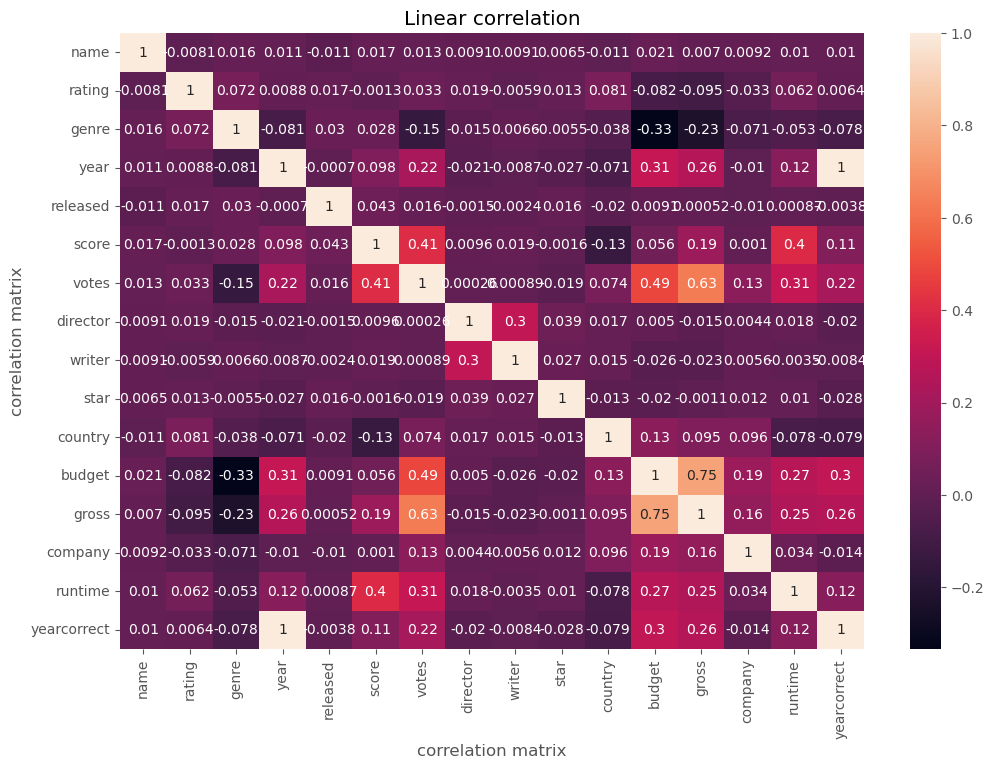

In [47]:
# plot the numerized matrix


correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Linear correlation')
plt.xlabel('correlation matrix')
plt.ylabel('correlation matrix')
plt.show()

In [48]:
#to see the ones that have highest correlation


correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.010392
             yearcorrect    0.010225
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [49]:
#show the sorted pairs

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.334021
genre        budget        -0.334021
             gross         -0.234297
gross        genre         -0.234297
votes        genre         -0.145307
genre        votes         -0.145307
score        country       -0.133348
country      score         -0.133348
rating       gross         -0.095450
gross        rating        -0.095450
budget       rating        -0.081939
rating       budget        -0.081939
genre        year          -0.081261
year         genre         -0.081261
country      yearcorrect   -0.079009
yearcorrect  country       -0.079009
runtime      country       -0.078412
country      runtime       -0.078412
yearcorrect  genre         -0.078210
genre        yearcorrect   -0.078210
             company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
runtime      genre         -0.052711
genre        runtime       -0.052711
country      genre         -0.037615
g

In [51]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross        votes          0.632834
votes        gross          0.632834
gross        budget         0.750157
budget       gross          0.750157
yearcorrect  year           0.996397
year         yearcorrect    0.996397
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64